# Storytelling Data Visualization on Exchange Rates

### Scenario

We are given a data that describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union. If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

### Goal

Identify a story angle and create a visualization with the following:
- Maximizes the data-ink ratio
- Creates visual patterns using Gestalt principles
- Guides the audience's attention using pre-attentive attributes

### Results

The dataset was enclosed visually by the last three presidential terms: Bush, Obama, and Trump. This was done to compare how the euro-dollar rate performed during each administration. The rate had the highest appreciation during Bush's term, depreciation during Obama's term, and a slight appreciation during Trump's term.

## Introducing the dataset

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings

%matplotlib inline
style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

### Importing the dataset

In [2]:
exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")

### Exploring the dataset

We print out the first and last five rows to understand the structure of the dataset.

In [3]:
print(exchange_rates.head())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [4]:
print(exchange_rates.tail())

     Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
5694   1999-01-08               1.8406              NaN               NaN   
5695   1999-01-07               1.8474              NaN               NaN   
5696   1999-01-06               1.8820              NaN               NaN   
5697   1999-01-05               1.8944              NaN               NaN   
5698   1999-01-04               1.9100              NaN               NaN   

     [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ]  \
5694             1.7643         1.6138                      NaN   
5695             1.7602         1.6165                      NaN   
5696             1.7711         1.6116                      NaN   
5697             1.7965         1.6123                      NaN   
5698             1.8004         1.6168                      NaN   

     [Cypriot pound ] [Czech koruna ] [Danish krone ]  ... [Romanian leu ]  \
5694          0.58187          34.938          7.4433  .

In [5]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [6]:
exchange_rates.columns

Index(['Period\Unit:', '[Australian dollar ]', '[Bulgarian lev ]',
       '[Brazilian real ]', '[Canadian dollar ]', '[Swiss franc ]',
       '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]',
       '[Danish krone ]', '[Estonian kroon ]', '[UK pound sterling ]',
       '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]',
       '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]',
       '[Indian rupee ]', '[Iceland krona ]', '[Japanese yen ]',
       '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', '[US dollar ]',
       '[South African rand ]'],
      dtype='object')

## Cleaning the dataset

There are 5,699 rows and 41 columns in the dataset. Looking at the column names, the first column represents dates expressed as an `object` type and the other 40 columns being denominations of other currencies expressed as either an `object` or a `float64` type. 

For proper examination, the dates will need to be converted to `datetype` and the denominations all as `float64`.

But first, we start by cleaning up the column headers.

### Renaming column headers

In [7]:
# Remove starting and ending brackets
exchange_rates.columns = exchange_rates.columns.str.replace("[", "")
exchange_rates.columns = exchange_rates.columns.str.replace("]", "")
# Remove trailing whitespace
exchange_rates.columns = exchange_rates.columns.str.strip()
# Replace spaces with underscores then convert to lowercase
exchange_rates.columns = exchange_rates.columns.str.replace(" ", "_").str.lower()

# Rename 'period\unit' column to 'date'
exchange_rates.rename({"period\\unit:": "date"}, axis=1, inplace=True)

In [8]:
exchange_rates.columns

Index(['date', 'australian_dollar', 'bulgarian_lev', 'brazilian_real',
       'canadian_dollar', 'swiss_franc', 'chinese_yuan_renminbi',
       'cypriot_pound', 'czech_koruna', 'danish_krone', 'estonian_kroon',
       'uk_pound_sterling', 'greek_drachma', 'hong_kong_dollar',
       'croatian_kuna', 'hungarian_forint', 'indonesian_rupiah',
       'israeli_shekel', 'indian_rupee', 'iceland_krona', 'japanese_yen',
       'korean_won', 'lithuanian_litas', 'latvian_lats', 'maltese_lira',
       'mexican_peso', 'malaysian_ringgit', 'norwegian_krone',
       'new_zealand_dollar', 'philippine_peso', 'polish_zloty', 'romanian_leu',
       'russian_rouble', 'swedish_krona', 'singapore_dollar',
       'slovenian_tolar', 'slovak_koruna', 'thai_baht', 'turkish_lira',
       'us_dollar', 'south_african_rand'],
      dtype='object')

### Sorting the dataset

In [9]:
exchange_rates.sort_values("date", inplace=True)

### Removing rows where "us_dollar" = "-"

In [10]:
exchange_rates["us_dollar"].value_counts()

us_dollar
-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: count, Length: 3528, dtype: int64

In [11]:
exchange_rates = exchange_rates[exchange_rates["us_dollar"] != "-"]

### Converting date types

In [12]:
exchange_rates["date"] = pd.to_datetime(exchange_rates["date"])

In [13]:
exchange_rates["us_dollar"].astype(float)

5698    1.1789
5697    1.1790
5696    1.1743
5695    1.1632
5694    1.1659
         ...  
4       1.2296
3       1.2271
2       1.2338
1       1.2276
0       1.2250
Name: us_dollar, Length: 5637, dtype: float64

## Visualising the dataset

### Rolling mean

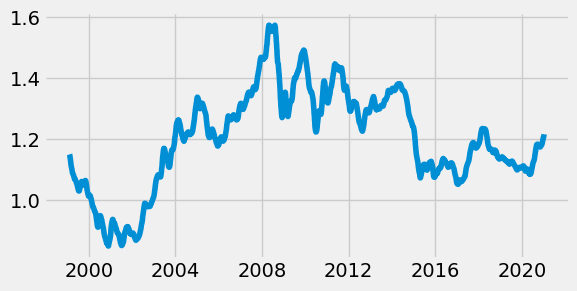

In [14]:
euro_dollar = exchange_rates[["date", "us_dollar"]].copy()
euro_dollar["rolling_mean"] = euro_dollar["us_dollar"].rolling(30).mean()

spines= ["left", "right", "top", "bottom"]

fig, ax = plt.subplots(figsize=(6,3))
ax.plot(euro_dollar["date"], euro_dollar["rolling_mean"])
ax.tick_params(left=0, bottom=0)
for spine in spines:
    ax.spines[spine].set_visible(False)
plt.show()

In [15]:
print(euro_dollar[euro_dollar["us_dollar"] == euro_dollar["us_dollar"].max()])

           date us_dollar  rolling_mean
3212 2008-07-15    1.5990      1.563547


The graph above illustrates how the euro-dollar rate changed between 1999 and 2021, peaking at 1.599 on July 15, 2008.

We explore how the rate has changed under the last three presidential administrations.

### Visualizing rate by presidential administration

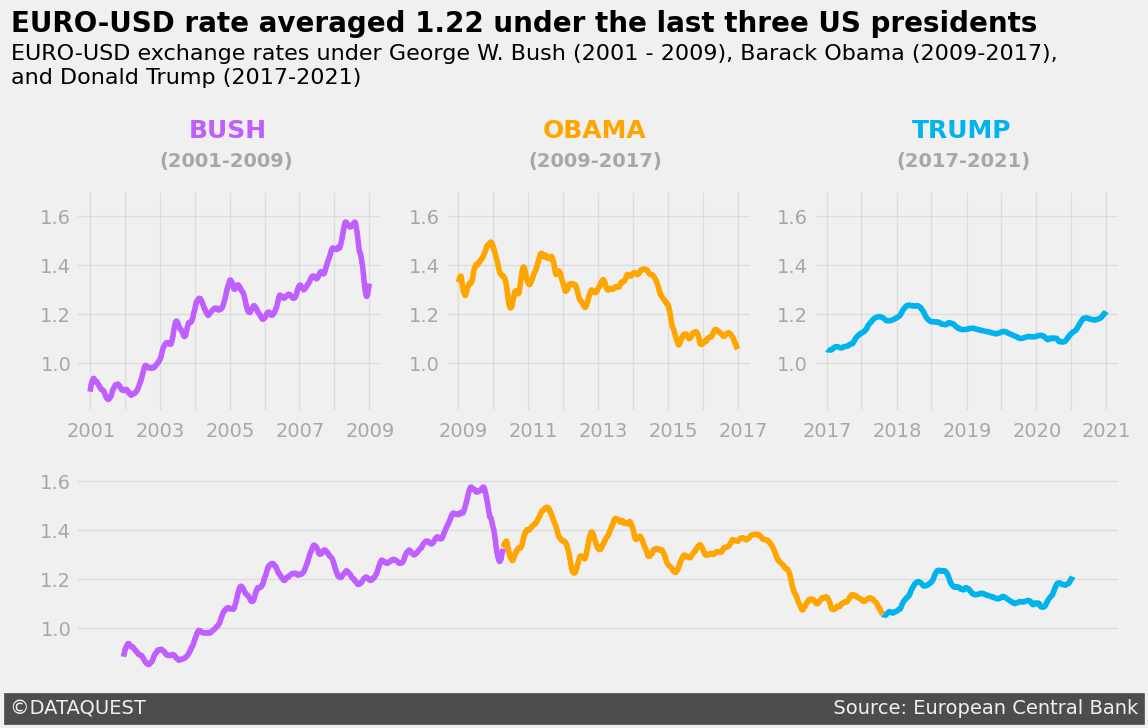

In [16]:
bush_obama_trump = euro_dollar.copy()[(euro_dollar["date"].dt.year >= 2001) & (euro_dollar["date"].dt.year < 2021)]
bush = bush_obama_trump.copy()[bush_obama_trump["date"].dt.year < 2009]
obama = bush_obama_trump.copy()[(bush_obama_trump["date"].dt.year >= 2009) & (bush_obama_trump["date"].dt.year < 2017)]
trump = bush_obama_trump.copy()[(bush_obama_trump["date"].dt.year >= 2017) & (bush_obama_trump["date"].dt.year < 2021)]

plt.figure(figsize=(12,6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(["1.0", "1.2", "1.4", "1.6"], alpha=0.3)
    ax.grid(alpha=0.5)    
    
ax1.plot(bush["date"], bush["rolling_mean"], color="#BF5FFF")
# print(ax1.get_xticks())
ax1.set_xticklabels([])
x = 11075
for year in ["2001", "2003", "2005", "2007", "2009"]:
    ax1.text(x, .7, year, alpha=0.3)
    x += 365*2
ax1.text(12353.0, 1.92, "BUSH", fontsize=18, weight="bold", color="#BF5FFF")
ax1.text(12053.0, 1.8, "(2001-2009)", weight="bold", alpha=0.3)

ax2.plot(obama["date"], obama["rolling_mean"], color="#ffa500")
# print(ax2.get_xticks())
ax2.set_xticklabels([])
x = 14975
for year in ["2009", "2011", "2013", "2015", "2017"]:
    ax1.text(x, .7, year, alpha=0.3)
    x += 365*2
ax2.text(15125.0, 1.92, "OBAMA", fontsize=18, weight="bold", color="#ffa500")
ax2.text(14975.0, 1.8, "(2009-2017)", weight="bold", alpha=0.3)

ax3.plot(trump["date"], trump["rolling_mean"], color="#00B2EE")
# print(ax3.get_xticks())
ax3.set_xticklabels([])
x = 18780
for year in ["2017", "2018", "2019", "2020", "2021"]:
    ax1.text(x, .7, year, alpha=0.3)
    x += 365*2
ax3.text(17613.0, 1.92, "TRUMP", fontsize=18, weight='bold', color='#00B2EE')
ax3.text(17532.0, 1.8, '(2017-2021)', weight="bold", alpha=0.3)

ax4.plot(bush["date"], bush["rolling_mean"], color="#BF5FFF")
ax4.plot(obama["date"], obama["rolling_mean"], color="#ffa500")
ax4.plot(trump["date"], trump["rolling_mean"], color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

x = 10500
ax1.text(x*1.0, 2.35, 
         'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight="bold")
ax1.text(x*1.0, 2.14, 
         '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
         fontsize=16)

ax4.text(x*1.0-50, 0.65, "©DATAQUEST" + " "*110 + "Source: European Central Bank",
        color = "#f0f0f0", backgroundcolor = "#4d4d4d", size=14)

plt.show()

The euro-dollar rate had the highest appreciation during the Bush's 8-year term, depreciation during Obama's 8-year term, and a slight appreciation during Trump's 4-year term.